
Choose a two variable problem from OT Text or any other.

Plot Surface and Contour

Use Scipy.optimize to find the local minima with and without constrains

plot your solution on the surface and contour


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


## Two Variable with constrains

$$
f(x1,x2) = x1**2 + x2**2  
$$

$subject$  $to$

$$
g(x1,x2) = x1*x2 = 8  
$$

Text(0.5, 0, 'f(X)')

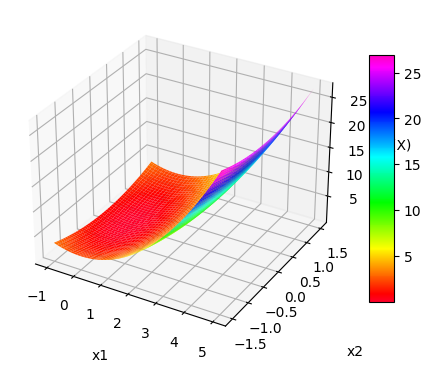

In [3]:
from mpl_toolkits.mplot3d import Axes3D

f = lambda x1, x2: x1**2 + x2**2
x2 = np.linspace(-1.5,1.5,100)
x1 = np.linspace(-1,5,100)

X, Y = np.meshgrid(x1,x2)
F = f(X,Y)

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,2,1,projection='3d') # set up the axis as a 3D plot

surf = ax.plot_surface(X,Y,F, cmap= 'gist_rainbow')
fig.colorbar(surf,shrink=0.4, aspect=10)
# set axes label
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=30)
ax.set_zlabel('f(X)', labelpad=10)

In [17]:

def f(x):
    # The objective function to minimize
    x, y = x
    return x**2 + y**2

def g(x):
    # Constraint function (for example, x + y = 1)
    x, y = x
    return x + y - 1


In [15]:
# Bounds for x and y (example: -5 to 5 for both)
bounds = ((-5, 5), (-5, 5))


In [18]:
initial_guess = [0, 0]  # Initial guess for x and y
result = minimize(f, initial_guess, method='SLSQP', constraints={'type': 'eq', 'fun': g}, bounds=bounds)
result


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.5
       x: [ 5.000e-01  5.000e-01]
     nit: 3
     jac: [ 1.000e+00  1.000e+00]
    nfev: 10
    njev: 3

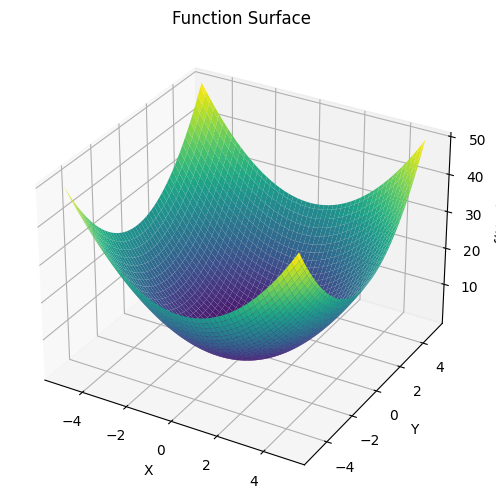

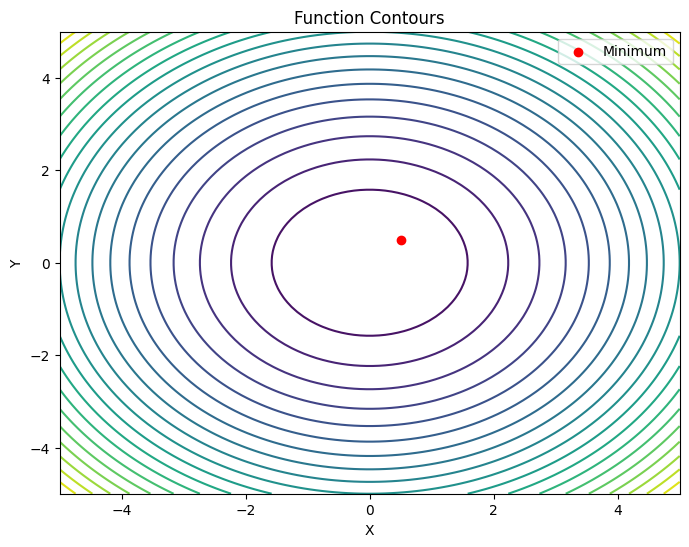

Minimum value: 0.5


In [7]:
# Create meshgrid for x and y values
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the corresponding z values (f(x, y)) for the meshgrid
Z = f([X, Y])

# Plot the surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Function Surface')

# Plot the contours
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Function Contours')

# Plot the minimum point found by the optimization
min_x, min_y = result.x
plt.scatter(min_x, min_y, color='red', label='Minimum')
plt.legend()

plt.show()
# Access the minimum value of the objective function
minimum_value = result.fun
print("Minimum value:", minimum_value)


### Another Example:

$$
\text{Minimize}\ f(x)= (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
$$



In [8]:
import numpy as np

def f(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2


In [12]:
from scipy.optimize import minimize

# Initial guess for the minimum
initial_guess = [0, 0]

# Minimize the function using the Nelder-Mead method
result = minimize(f, initial_guess, method='Nelder-Mead')
result


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.6861769151759075e-10
             x: [ 1.000e+00  1.000e+00]
           nit: 79
          nfev: 146
 final_simplex: (array([[ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  9.999e-01],
                       [ 1.000e+00,  1.000e+00]]), array([ 3.686e-10,  1.636e-09,  2.022e-09]))

In [10]:
import matplotlib.pyplot as plt

# Create a grid of points for the surface plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)


# Calculate the corresponding z values (f(x, y)) for the meshgrid
Z = f([X, Y])


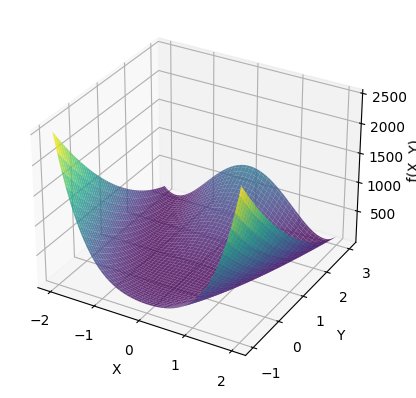

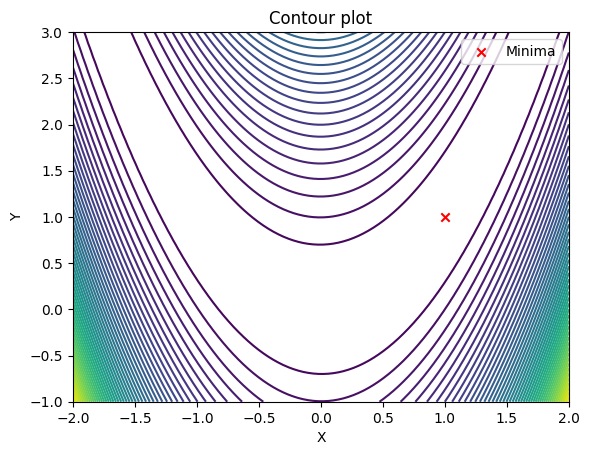

Minimum value: 3.6861769151759075e-10


In [13]:
# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

# Plot the contours
plt.figure()
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour plot')

# Plot the minimum found by the optimization
plt.scatter(result.x[0], result.x[1], c='red', label='Minima', marker='x')
plt.legend()
plt.show()

# Access the minimum value of the objective function
minimum_value = result.fun
print("Minimum value:", minimum_value)
